# Basic Layers

Apart from the basic nodes we encountered in the previous chapter, PyTorch also provides us more complex *layers* which encapsulate groups of nodes.
From the perspective of the computational graph, a layer is basically a subgraph of the computational graph.

However, it is usually more helpful to treat layers as mathematical functions that take input tensors and produce output tensors.

Layers are located in the `torch.nn` package, so we need to import it along with a few other packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

We will also set the seed for generating random numbers to improve reproducibility of our examples:

In [2]:
torch.manual_seed(42)

We will also disable printing in scientific mode to simplify how our tensors are output to the console:

In [3]:
torch.set_printoptions(sci_mode=False)

## The Linear Layer

One of the simplest and most important layers is the **linear layer**.

The linear layer represents the function $f(\vec{x}) = W\vec{x} + \vec{b}$.
Put differently, the linear layer takes an input tensor $\vec{x}$ and produces an output tensor $\vec{y} = W\vec{x} + \vec{b}$.

Usually the matrix `W` is called the _weight matrix_ and the vector `b` the _bias_.

Whenever you are thinking about a layer, it is very helpful to think about the dimensions of the tensors involved. 
Consider an example, where $\vec{x}$ has $3$ features, i.e. $\vec{x} \in \mathbb{R}^{3}$.
Let $\vec{y}$ represent a probability distribution over $4$ classes, i.e. $\vec{y} \in \mathbb{R}^{4}$.
Then we have $W \in \mathbb{R}^{4 \times 3}$ and $\vec{b} \in \mathbb{R}^{4}$ (otherwise the dimensions won't match).

This is how the above example would look in code:

In [4]:
d_in = 3
d_out = 4

x = torch.randn(d_in)

layer = nn.Linear(in_features=d_in, out_features=d_out)

y = layer(x)

Observe how the usage of the layer further emphasizes its nature as a mathematical function.
Indeed, the layer can be called as a function that takes an input argument `x` and simply produces an output argument `y`.

Let's now verify that the dimensions and values are what we expect.

First, let's check that `x` is a one-dimensional tensor (i.e. a vector) of size `3`:

In [5]:
print(x)

tensor([0.3367, 0.1288, 0.2345])


In [6]:
print(x.size())

torch.Size([3])


Next, let's verify that `y` is a one-dimensional tensor (i.e. a vector) of size `4`:

In [7]:
print(y)

tensor([-0.0315,  0.0420, -0.0469,  0.4115], grad_fn=<ViewBackward0>)


In [8]:
print(y.size())

torch.Size([4])


Next, let's verify that `W` is a two-dimensional tensor (i.e. a matrix) of size `4x3`:

In [9]:
print(layer.weight)

Parameter containing:
tensor([[ 0.5090, -0.4236,  0.5018],
        [ 0.1081,  0.4266,  0.0782],
        [ 0.2784, -0.0815,  0.4451],
        [ 0.0853, -0.2695,  0.1472]], requires_grad=True)


In [10]:
print(layer.weight.shape)

torch.Size([4, 3])


And finally, we check that `b` is a one-dimensional tensor (i.e. a vector) of size `4`:

In [11]:
print(layer.bias)

Parameter containing:
tensor([-0.2660, -0.0677, -0.2345,  0.3830], requires_grad=True)


In [12]:
print(layer.bias.shape)

torch.Size([4])


Put more generally if we have an input vector $\vec{x} \in \mathbb{R}^d$, the linear layer with parameters $W \in \mathbb{R}^{k \times d}$ and $\vec{b} \in \mathbb{R}^k$ will compute an output vector $\vec{y} \in \mathbb{R}^k$.
Always keep thinking about tensor dimensionalities - this is really helpful when you are trying to understand a layer.

Let's also check that the linear layer indeed performs the calculation $f(\vec{x}) = W\vec{x} + \vec{b}$:

In [13]:
manual_y = torch.matmul(layer.weight, x) + layer.bias

In [14]:
print(manual_y)

tensor([-0.0315,  0.0420, -0.0469,  0.4115], grad_fn=<AddBackward0>)


In [15]:
print((y == manual_y).all())

tensor(True)


Redoing the calculations of a layer manually is not something you will do in production, but it's a really helpful way to make sure that your understanding is correct.

Note that we can pass a batch through the linear layer:

In [16]:
batch_dim = 2

X = torch.randn(batch_dim, d_in)
Y = layer(X)

In [17]:
print(X.shape)

torch.Size([2, 3])


In [18]:
print(Y.shape)

torch.Size([2, 4])


Compared to the vectors `x` and `y` from before, the tensors `X` and `Y` now have an additional dimension - the batch dimension.
Basically, we can perform the calculation of the linear layer for multiple vectors _at the same time_ greatly speeding up the computation.

We can verify that `Y` just contains the result of applying the linear function $f(\vec{x}) = W\vec{x} + \vec{b}$ to every row of `X` at the same time:

In [19]:
manual_y_0 = torch.matmul(layer.weight, X[0]) + layer.bias
manual_y_1 = torch.matmul(layer.weight, X[1]) + layer.bias
manual_Y = torch.stack((manual_y_0, manual_y_1), dim=0)

In [20]:
print(Y)

tensor([[    -1.4670,      0.2987,     -1.0130,     -0.1453],
        [    -0.5116,      0.3374,      0.0005,      0.2350]],
       grad_fn=<AddmmBackward0>)


In [21]:
print(manual_Y)

tensor([[    -1.4670,      0.2987,     -1.0130,     -0.1453],
        [    -0.5116,      0.3374,      0.0005,      0.2350]],
       grad_fn=<StackBackward0>)


In [22]:
print((Y == manual_Y).all())

tensor(True)


As discussed in the chapter on computational graphs, when we train a neural network we really _update its parameters_.
Now that we have layers, we update the parameters of the layers.
In the case of the linear layer these are `W` and `b`.

We can view all learnable parameters of a layer using the `parameters()` and `named_parameters()` methods:

In [23]:
for param in layer.parameters():
    print(param)

Parameter containing:
tensor([[ 0.5090, -0.4236,  0.5018],
        [ 0.1081,  0.4266,  0.0782],
        [ 0.2784, -0.0815,  0.4451],
        [ 0.0853, -0.2695,  0.1472]], requires_grad=True)
Parameter containing:
tensor([-0.2660, -0.0677, -0.2345,  0.3830], requires_grad=True)


In [24]:
for name, param in layer.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[ 0.5090, -0.4236,  0.5018],
        [ 0.1081,  0.4266,  0.0782],
        [ 0.2784, -0.0815,  0.4451],
        [ 0.0853, -0.2695,  0.1472]], requires_grad=True)
bias Parameter containing:
tensor([-0.2660, -0.0677, -0.2345,  0.3830], requires_grad=True)


## Activation Functions

So far our learning hasn't been really _deep_ which is kind of a shame given that the field this book is about is called _deep learning_.

Instead of having a single layer, with modern neural networks we have multiple layers on top of each other.
The idea here is that each layer learns progressively more complex features.
For example, the first layer might learn how individual words interact with each other, the second layer might look at word groups and the third layer might look at sentences.
Note that this just an example - in practice the layers learn much more complicated features that can't be easily described (this is also one of their drawbacks).

How would we go about constructing such a _deep_ network?

Unfortunately, we can't just put linear layers on top of each other.
Consider two linear layers which compute $\vec{h} = W\vec{x} + \vec{b}$ and $\vec{y} = V\vec{h} + \vec{c}$ respectively.
Then we would have $\vec{y} = V\vec{h} + \vec{c} = V(W\vec{x} + \vec{b} + \vec{c}) = VW\vec{x} + V\vec{b} + \vec{c}$.
Let $U = VW$ and $\vec{d} = V\vec{b} + \vec{c}$ and we can see that $\vec{y} = U\vec{x} + \vec{c}$.
Therefore the composition of two linear layers is again a linear layer!

If you know your linear algebra, the above computation was a trivial exercise, but it reveals an important truth.
_We need to go beyond linearities to obtain models with rich capabilities._

To solve this problem, we introduce a _nonlinear activation function_ between the layers to break the linearity.
That is, the first layer computes $\vec{h} = f(W\vec{x} + \vec{b})$ where $f$ is some nonlinear function and is usually applied elementwise to the vector $W\vec{x} + \vec{b}$.

If we have two linear layers separated by a nonlinear activation function, the resulting function is _no longer linear_ and we can build impressively capable models.
With the idea clear, we need to actually _define_ the activation function.

We could use the sigmoid from the chapter on computational graphs.
However, this function has a problem which we can see if we look at the graph of its derivative:

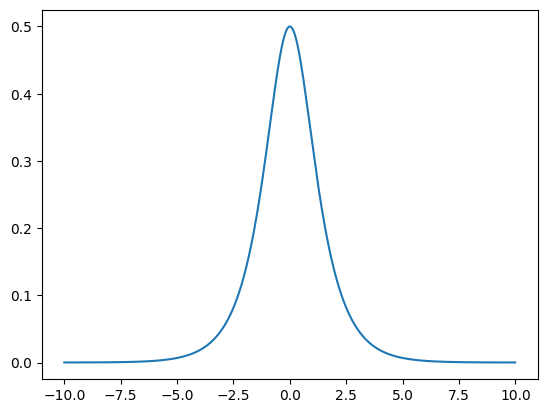

In [25]:
sigmoid_derivative_xs = np.arange(-10, 10, 0.01)
sigmoid_derivative_ys = np.exp(-sigmoid_derivative_xs) / (1 + np.exp(-sigmoid_derivative_xs) ** 2)
plt.plot(sigmoid_derivative_xs, sigmoid_derivative_ys)

The derivative of the sigmoid function is very close to $0$ outside of a relatively small input range.
Why is this a problem?

Let's say that during backpropagation the sigmoid node receives a derivative $\frac{\partial L}{\partial y}$ (where $y$ is the output of the sigmoid node).
It will then backpropagate the derivative $\frac{\partial L}{\partial z} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z}$.
But if $\frac{\partial y}{\partial z}$ is approximately $0$, the derivative $\frac{\partial L}{\partial z}$ will be approximately $0$ as well.
The derivative (and therefore the error signal) is now lost.

Just as a side note, the above explanation is an example for why it is so important to actually understand what backpropagation does on a technical level even though you will probably never need to implement it.
It would be very hard to grasp why sigmoids are a bad idea for activation functions unless you are _actually capable of doing the math_ (luckily the math _to do_ is really not that complicated).
This is not the last time we will encounter a problem that has its roots in the way backpropagation operates.

Executive summary - we need a different activation function that does not have such a small "good" range of inputs. A very simple way to address this is to simply take the identity function and cut off half the input range resulting in $f(x) = \max(0, x)$:

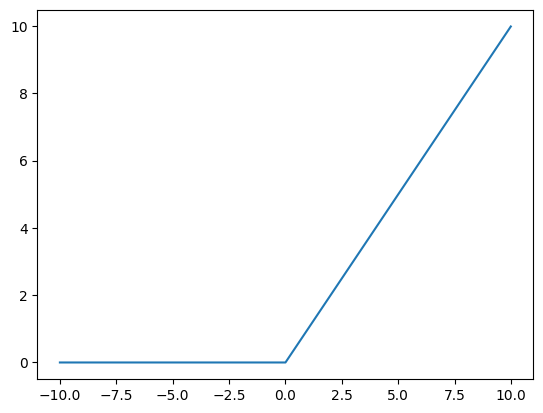

In [26]:
relu_xs = np.arange(-10, 10, 0.01)
relu_ys = np.maximum(0, relu_xs)
plt.plot(relu_xs, relu_ys)

The derivative of this function is $0$ if $x < 0$ and $1$ if $x > 0$ (we also usually set it to $0$ if $x = 0$ to ensure that the derivative is defined everywhere).
We still lose half the input range, but the crucial point is that as long as $x > 0$ we are fine.

Interestingly, this function is not called the "most lazy activation possible" but has the fancy name **Rectified Linear Unit** instead (ReLU for short).
Not only is this function very ~~lazy~~ simple, but it works extremely well in practice.
So well in fact, that ReLU and its variants are the default activation functions people go with when creating neural networks.

Note that the ReLU function is also directly present in PyTorch:

In [27]:
relu = torch.nn.ReLU()

relu_xs = torch.tensor([-0.5, 0.0, 0.5])
print(relu(relu_xs))

tensor([0.0000, 0.0000, 0.5000])


The most well-known variant of ReLU commonly used in NLP is the GELU activation function.
The formula for GELU is $f(x) = x \Phi(x)$ where $\Phi$ is the Cumulative Distribution Function for the Gaussian Distribution.

This sounds relatively complicated - but if we look at a graph, we see that GELU is simply a variant of ReLU where we have a nonzero derivate for $x < 0$:

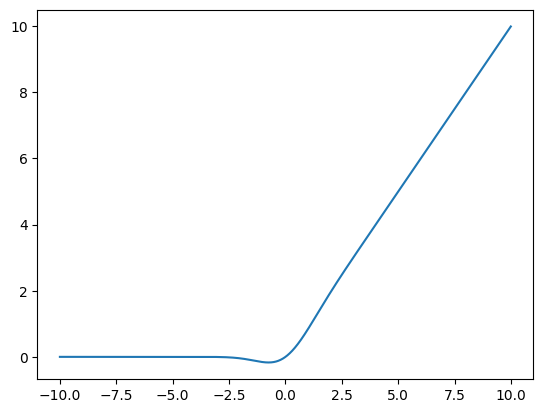

In [28]:
gelu = torch.nn.GELU()

gelu_xs = np.arange(-10, 10, 0.01)
gelu_ys = gelu(torch.tensor(gelu_xs))
plt.plot(gelu_xs, gelu_ys)

## The Embedding Layer

The embedding layer is basically just a simple lookup table that can map IDs to high-dimensional, dense vectors:

In [29]:
embedding_layer = nn.Embedding(num_embeddings=10, embedding_dim=3)

print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3189, -0.4245,  0.3057],
        [-0.7746,  0.0349,  0.3211],
        [ 1.5736, -0.8455, -1.2742],
        [ 2.1228, -1.2347, -0.4879],
        [-1.4181,  0.8963,  2.2181],
        [ 0.5232,  0.3466, -0.1973],
        [-1.0546,  1.2780,  0.1453],
        [ 0.2311,  0.0566,  0.4263],
        [ 0.5750, -0.6417, -2.2064],
        [-0.7508,  2.8140,  0.3598]], requires_grad=True)


Let's say that we would like to retrieve the embeddings for IDs `3`, `2` and `5`.
Then we could simply pass the tensor containing these IDs to the embedding layer:

In [30]:
emb_x = torch.tensor([3, 2, 5])

emb_y = embedding_layer(emb_x)
print(emb_y)

tensor([[ 2.1228, -1.2347, -0.4879],
        [ 1.5736, -0.8455, -1.2742],
        [ 0.5232,  0.3466, -0.1973]], grad_fn=<EmbeddingBackward0>)


As you can see the output contains the rows `3`, `2` and `5` from the lookup table.

Note that the lookup table is a learnable parameter:

In [31]:
for name, param in embedding_layer.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[ 0.3189, -0.4245,  0.3057],
        [-0.7746,  0.0349,  0.3211],
        [ 1.5736, -0.8455, -1.2742],
        [ 2.1228, -1.2347, -0.4879],
        [-1.4181,  0.8963,  2.2181],
        [ 0.5232,  0.3466, -0.1973],
        [-1.0546,  1.2780,  0.1453],
        [ 0.2311,  0.0566,  0.4263],
        [ 0.5750, -0.6417, -2.2064],
        [-0.7508,  2.8140,  0.3598]], requires_grad=True)


Embeddings are extremely useful in LLMs because they allow us to map discrete units (like words or word positions) to high-dimensional, continuous vectors such that the vectors can be learned by the LLM.
For example, we could create _word embeddings_ in such a way that semantically similar words result in embeddings which are spatially close to each other.
We could then pass these word embeddings to other layer that would learn further features.

## Dropout

As we already explained in the chapter on computational graphs, one of the biggest challenges when training neural networks is to avoid overfitting.
We briefly talked about a few methods that can be used to accomplish this - however, we have not mentioned one of the most important methods which is called **dropout**.

The idea here is to randomly drop some neurons during training to avoid neurons becoming too dependent on other specific neurons.
This way we force neurons to learn robust features.

Technically speaking, the dropout layer randomly zeroes some of the elements of the input tensor using sampling from a Bernoulli distribution with probability `p`.
Furthermore, the outputs are normalized via scaling by a factor of `1/(1-p)`. 

Let's have a look at an example:

In [32]:
dropout_layer = nn.Dropout(p=0.5)

drop_x = torch.randn(5)
print(drop_x)

tensor([ 0.8172,  0.7596,  0.7343, -0.6708,  2.7421])


In [33]:
drop_y = dropout_layer(drop_x)
print(drop_y)

tensor([1.6344, 1.5191, 1.4687, -0.0000, 0.0000])


In [34]:
drop_X = torch.randn(3, 5)
print(drop_X)

tensor([[ 1.5815, -0.1981,  0.9554, -1.0902,  2.5952],
        [ 2.7504,  0.6488,  0.4496,  0.3220, -1.0503],
        [ 0.0274, -0.7916, -0.5601, -0.9977, -0.9444]])


In [35]:
drop_Y = dropout_layer(X)
print(drop_Y)

tensor([[0.4607, 0.0000, -0.0000],
        [-0.0000, 0.0000, 0.0000]])


Note that the dropout layer only drops neurons during training:

In [36]:
print(dropout_layer.training)

True


If we set the dropout layer to evaluation mode using the `eval()` function, we will see that it no longer drops neurons:

In [37]:
dropout_layer.eval()
print(dropout_layer.training)

False


In [38]:
print(dropout_layer(x))

tensor([0.3367, 0.1288, 0.2345])


If we want to set it back to training mode, we can use the `train()` function:

In [39]:
dropout_layer.train()
print(dropout_layer.training)

True


In [40]:
print(dropout_layer(x))

tensor([0.0000, 0.2576, 0.4689])


Note that the `train()` function does not actually _do any training_, it only _sets_ a layer or a model _to training mode_.

> A common source of bugs when training models is to forget to set the model to training mode during training or to evaluation mode during evaluation, so watch out for that.

## Layer Normalization

Another important concept for stabilizing training is called **layer normalization**.

This is a technique that is used to normalize inputs across features of individual samples in a batch.
The idea is to ensure that each input to the next layer has a mean of zero and a variance of one.

To accomplish this, we compute the mean and the variance across features for each sample and then normalize them.

Consider the following tensor:

In [41]:
X = torch.randn(batch_dim, d_in)
print(X)

tensor([[-0.7357, -0.9648, -1.6645],
        [ 0.2046,  0.7237,  0.1275]])


Let's compute the mean and the variance of that tensor for every feature:

In [42]:
mean = X.mean(dim=-1, keepdim=True)
print(mean)

tensor([[-1.1217],
        [ 0.3519]])


In [43]:
var = X.var(dim=-1, keepdim=True)
print(var)

tensor([[0.2341],
        [0.1051]])


Note that `mean` contains the mean for every sample in the batch and `var` contains the variance for every sample in the batch.

We can now normalize the tensor:

In [44]:
X_norm = (X - mean) / torch.sqrt(var)
print(X_norm)

tensor([[ 0.7977,  0.3242, -1.1219],
        [-0.4544,  1.1465, -0.6921]])


If we recompute the mean and the variance of the new tensor, we will see that the mean is now zero and the variance is now one for every sample:

In [45]:
X_norm.mean(dim=-1, keepdim=True)

tensor([[    -0.0000],
        [     0.0000]])

In [46]:
X_norm.var(dim=-1, keepdim=True)

tensor([[1.0000],
        [1.0000]])

Commonly we also scale and shift each normalized feature using learnable parameters `scale` and `shift`.
If we would implement a full `LayerNorm` layer from scratch it would look as following:

In [47]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift 

In [48]:
layer_norm = LayerNorm(d_in)
print(layer_norm(X))

tensor([[ 0.9770,  0.3970, -1.3740],
        [-0.5565,  1.4041, -0.8476]], grad_fn=<AddBackward0>)


Let's compare our manual layer to the builtin `nn.LayerNorm` layer to see if our calculations match:

In [49]:
layer_norm_torch = nn.LayerNorm(d_in)
print(layer_norm_torch(X))

tensor([[ 0.9770,  0.3970, -1.3740],
        [-0.5565,  1.4041, -0.8476]], grad_fn=<NativeLayerNormBackward0>)
